# Illustrating the Use of Polynomial Regression

In this brief and very simple program we will demonstrate how polynomial regression can be employed to improve model performance. The dataset used consists of employee salaries in a company, and contains only 10 samples.

We begin by reading the data into a Pandas data frame and assigning our feature and taget variable.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# read data into Pandas data frame
df = pd.read_csv('poly_data_salaries.csv')

# assign feature to X and target to y, and reshape for sklearn
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values.reshape(-1, 1)

Let's plot the data to examine the relationship between the feature and the target.

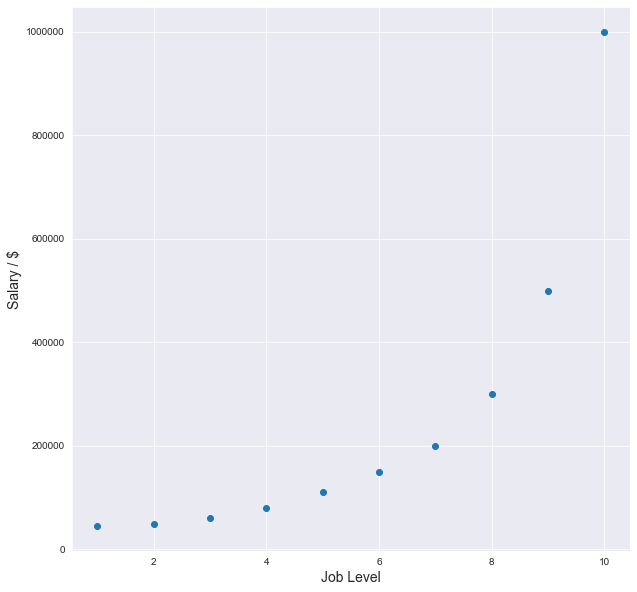

In [61]:
# generate plot and add data
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.scatter(X, y)
ax.set_xlabel('Job Level', fontsize = 14)
ax.set_ylabel('Salary / $', fontsize = 14)
plt.show()

We can see that salary increases exponentially with job level in the company. We will start off fitting a linear regression model to the data.

In [62]:
# generate regressor
lin_reg = LinearRegression()
# fit to the data
lin_reg.fit(X, y)
# predict y
y_pred = reg.predict(X)
# get R^2 score
lin_reg_score = r2_score(y, y_pred)
print('Coefficient of determination, R^2: {:.2f}'.format(lin_reg_score))

Coefficient of determination, R^2: 0.67


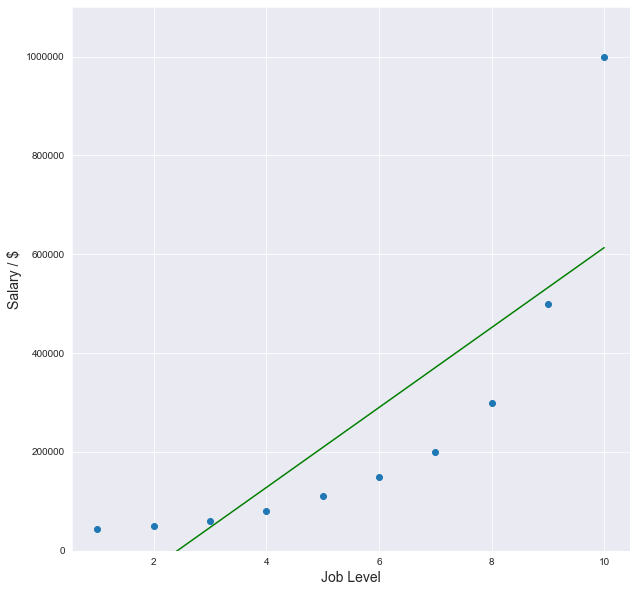

In [63]:
# generate x values for plotting
x = np.linspace(min(X), max(X), 100)
# predict y for these x values
y_lin_plot = reg.predict(x)

# generate plot and add regression line
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Job Level', fontsize = 14)
ax.set_ylabel('Salary / $', fontsize = 14)
ax.set_ylim(0, max(y) + 0.1*max(y))
ax.scatter(X, y, label = 'Original data')
ax.plot(x, y_lin_plot, color = 'g', label = 'Linear regression')
plt.show()

From the coefficient of determination and the plot we can see that the linear regression model is not a particularly good fit to the data. A quadratic curve will fit better, so now we try polynomial regression. 

Say we have a single feature $x$. The linear regression model will have the form $$h_\theta(x) = \theta_0 + \theta_1x$$In polynomial regression we replace this with $$h_\theta(x) = \theta_0 + \theta_1x +\theta_2x^2 + \theta_3x^3 + ... + \theta_nx^n$$ Therefore we can see that polynomial regression is just a special case of multiple linear regression where the features are the powers of our original feature $x$.

We are going to fit a polynomial curve of degree 2 to the data, that is we are going to use the model $$h_\theta(x) = \theta_0 + \theta_1x +\theta_2x^2\tag{1}$$ 

In [64]:
# create a polynomial instance
poly = PolynomialFeatures(degree = 2)
# fit and transform the features X
X_poly = poly.fit_transform(X)

In [65]:
# create linear regressor
lin_reg2 = LinearRegression()
# fit to the polynomial features
lin_reg2.fit(X_poly, y)
# predict y
y_pred2 = lin_reg2.predict(X_poly)
# get R^2 score
poly_score = r2_score(y, y_pred2)
print('Coefficient of determination, R^2: {:.2f}'.format(poly_score))

Coefficient of determination, R^2: 0.92


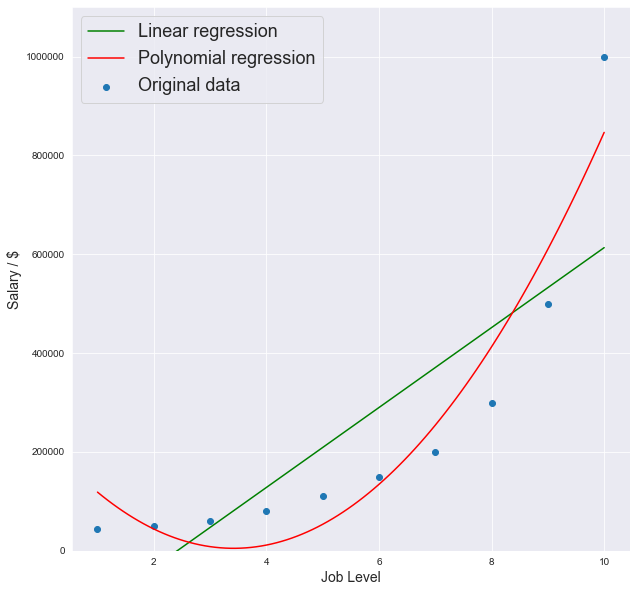

In [66]:
# get y-coordinates for plot
y_poly_plot = lin_reg2.predict(poly.fit_transform(x))

# generate plot and add regression curves
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('Job Level', fontsize = 14)
ax.set_ylabel('Salary / $', fontsize = 14)
ax.set_ylim(0, max(y) + 0.1*max(y))
ax.scatter(X, y, label = 'Original data')
ax.plot(x, y_lin_plot, color = 'g', label = 'Linear regression')
ax.plot(x, y_poly_plot, color = 'r', label = 'Polynomial regression')
plt.legend(prop = {'size': 18})
plt.show()

From the coefficient of determination and the plot we can see that the polynomial regression model is a substantial improvement on the linear model.